In [59]:
import torch
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt

torch.random.manual_seed(12345)
torch.manual_seed(12345)
torch.cuda.manual_seed(12345)

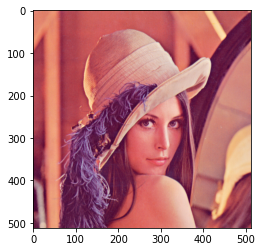

In [60]:
# image = cv2.imread('./image/lena.jpg')
image = plt.imread('./image/lena.jpg')
input_tensor = torch.tensor(data=image,dtype=torch.float32).cuda()
input_tensor = input_tensor.permute(2, 0, 1).unsqueeze(0)
arr = [[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]
kernel_tensor = torch.asarray(arr, dtype=torch.float32).unsqueeze(0).cuda()
plt.imshow(image)

In [61]:
# output_tensor = F.conv2d(input=input_tensor, weight=kernel_tensor, bias=None, stride=1, dilation=1, padding=1)
output_tensor = torch.cudnn_convolution(input=input_tensor, weight=kernel_tensor, padding=(1,1),stride=(1,1), dilation=(1,1),groups=1, deterministic=True,benchmark=True, allow_tf32=False)
output_tensor = output_tensor.squeeze(0).permute(1, 2, 0)

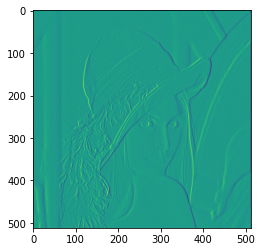

In [62]:
output_tensor = output_tensor.cpu().numpy()
plt.imshow(output_tensor)